# Exercise Ten: Mapping, Twitter Style

By Marissa Salas

Using my developer Twitter I imported data and collected tweets using the the hashtag #JonGruden which is the current football scandal. A scandal envolving racism, sexism, homophobia, and likley much more. 


In [25]:
import configparser
CONFIG = configparser.ConfigParser()
CONFIG.read('credentials.ini')

['credentials.ini']

In [26]:
import tweepy

auth = tweepy.OAuthHandler(CONFIG['DEFAULT']['consumer_key'], CONFIG['DEFAULT']['consumer_secret'])
auth.set_access_token(CONFIG['DEFAULT']['access_token'], CONFIG['DEFAULT']['access_token_secret'])

api = tweepy.API(auth, wait_on_rate_limit=True)

public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(tweet.text)


Marine Corps updates tattoo policy to allow for sleeves | Read more: https://t.co/oplm5E5zUN https://t.co/jKlRnja4ts
Some union leadership is so focused on state and federal power structures that they're missing the tectonic shifts… https://t.co/ynupkhMHG9
Attorneys general in 10 GOP states argue against Biden administration's vaccine mandate https://t.co/imRdu70sdX https://t.co/aCi80r3VCD
Alec Baldwin spoke publicly about Halyna Hutchins, the cinematographer he fatally shot on the movie set of "Rust."… https://t.co/0vkioOdu8g
Kinzinger retirement underscores Trump dominance over GOP https://t.co/aZw9Azi1E4 https://t.co/fUzOY9Qphs
Health concerns slow thousands of migrants moving through Mexico https://t.co/Q2LKCBD7ls https://t.co/FpnDGhInzn
Or sitting in his seat. Or infringing on a conversation among world leaders https://t.co/rFd4fI3aq5
Subpoenas are a real worry for lawmakers facing Jan. 6 questions https://t.co/Naq9ivYeKn https://t.co/1TxK2wapxf
UN, US urge Sudan military to allow

## I used the top hashtag on this subject #JonGruden using pandas to sort and analyze tweets.

In [27]:
import pandas as pd

search_words = "#JonGruden"
date_since = "2021-10-01"
tweets = tweepy.Cursor(api.search_tweets,
              q=search_words, lang="en").items(300)

  
tweets_sorted = [[tweet.user.screen_name, tweet.geo, tweet.user.location, tweet.text] for tweet in tweets]


In [28]:
tdf = pd.DataFrame(data=tweets_sorted, columns=['user', 'coordinates','location', 'tweet'])
print(tdf)

                user coordinates              location  \
0     PekoeBubbleTea        None                         
1     TheDeepEndPod_        None                         
2    KennyCh48453022        None  Somewhere in the sun   
3      cincere_allah        None          Metairie, LA   
4    Estelle27193025        None            Mobile, AL   
..               ...         ...                   ...   
279     BigJimSports        None        On God’s Earth   
280        RalphG322        None           Madison, Tn   
281       NGSCSports        None              Katy, TX   
282     BigJimSports        None        On God’s Earth   
283        RalphG322        None           Madison, Tn   

                                                 tweet  
0    RT @RealDLHughley: Ain’t it funny how when we ...  
1    Discussing Jon Gruden’s emails. OJ brings out ...  
2    RT @kennychesney: My friend #jongruden is the ...  
3    RT @RealDLHughley: Ain’t it funny how when we ...  
4    RT @RealDLHug

In [29]:
locs = tdf['location'].value_counts()
print(locs)

                        90
United States           11
Los Angeles, CA         10
Brooklyn, NY             5
Texas                    5
                        ..
Somewhere in the sun     1
Oklahoma City, OK        1
Michigan, USA            1
Philadelphia, PA         1
Halifax                  1
Name: location, Length: 136, dtype: int64


## There are 284 rows of data of which 137 have data in the location cell, with a lot of blanks but the majority is in Los Angeles with 10. 

## After installing Geopy in Anaconda, I ran the script to calculate user coordinates, where feasible, for the set of collected tweets. 

In [30]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

geolocator = Nominatim(user_agent='twitter-analysis-client')
limited = RateLimiter(geolocator.geocode, min_delay_seconds=1)

def find_location(row):
    place = row['location']
    location = limited(place)
    
    if location != None:
        return location.latitude, location.longitude
    else:
        return "Not Found", "Not Found"

tdf[['latitude','longitude']] = tdf.apply(find_location, axis="columns", result_type="expand")
tdf


,user,coordinates,location,tweet,latitude,longitude
0,PekoeBubbleTea,None,,RT @RealDLHughley: Ain’t it funny how when we ...,Not Found,Not Found
1,TheDeepEndPod_,None,,Discussing Jon Gruden’s emails. OJ brings out ...,Not Found,Not Found
2,KennyCh48453022,None,Somewhere in the sun,RT @kennychesney: My friend #jongruden is the ...,Not Found,Not Found
3,cincere_allah,None,"Metairie, LA",RT @RealDLHughley: Ain’t it funny how when we ...,29.99,-90.1505
4,Estelle27193025,None,"Mobile, AL",RT @RealDLHughley: Ain’t it funny how when we ...,30.6944,-88.0431
...,...,...,...,...,...,...
279,BigJimSports,None,On God’s Earth,#RT @NGSCSports: #RT @NGSCSports: #RT @NGSCSpo...,Not Found,Not Found
280,RalphG322,None,"Madison, Tn",#RT @NGSCSports: #RT @NGSCSports: #RT @NGSCSpo...,36.2562,-86.7139
281,NGSCSports,None,"Katy, TX",#RT @NGSCSports: #RT @NGSCSports: #RT @NGSCSpo...,29.7858,-95.8244
282,BigJimSports,None,On God’s Earth,#RT @NGSCSports: #RT @NGSCSports: #RT @NGSCSpo...,Not Found,Not Found


## Once again, after installing cartopy, I could run the script for mapping the lat and longs found in the dataframe using the PlateCarree projection.

In [31]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = (20, 10)

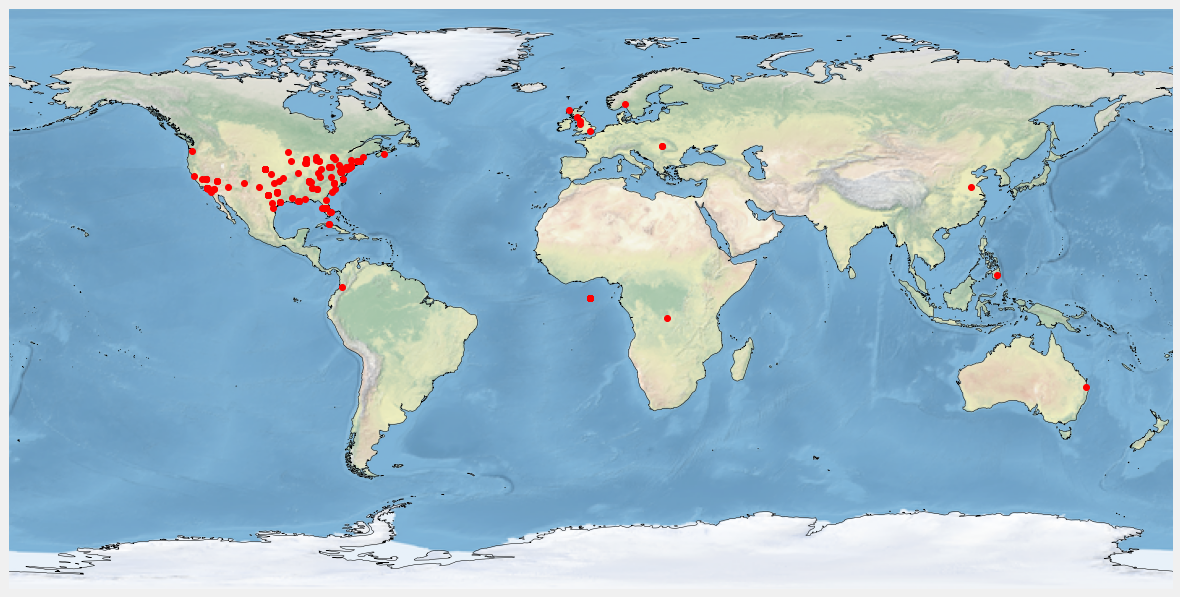

In [32]:
import cartopy.crs as ccrs
from matplotlib.patches import Circle

lats = tdf['latitude'].dropna()
longs = tdf['longitude'].dropna()

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
    
for i in range(0, len(lats)):
    ax.plot(longs[i], lats[i], 'ro', transform=ccrs.PlateCarree())
                                                                                              
ax.coastlines(resolution='50m')
ax.set_global()

plt.show()


My bonus challenge, to map the LA with the most, and Brisbane (far with only one) the data with labels. 

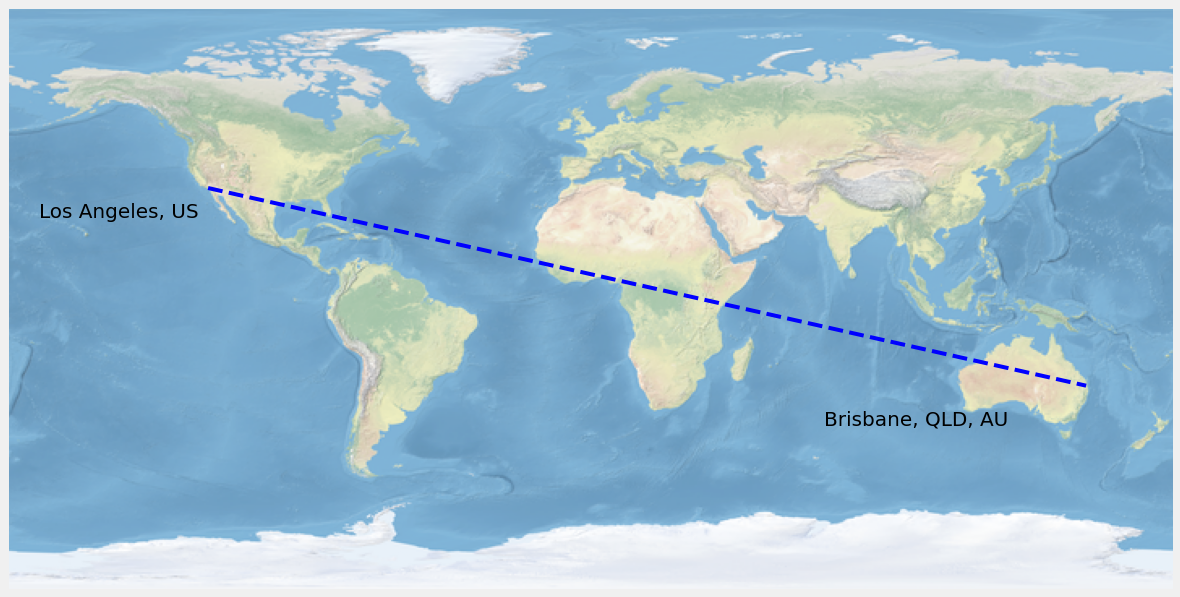

In [54]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

la_lon, la_lat = -118, 34
bris_lon, bris_lat = 153, -27

#plt.plot([la_lon, bris_lon], [la_lat, bris_lat],
#         color='blue', linewidth=2, marker='o',
#         transform=ccrs.Geodetic(),
#         )

plt.plot([la_lon, bris_lon], [la_lat, bris_lat],
         color='blue', linestyle='--',
         transform=ccrs.PlateCarree(),
         )

plt.text(la_lon - 3, bris_lat + 52, 'Los Angeles, US',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(la_lon + 190, bris_lat - 12, 'Brisbane, QLD, AU',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.show()